In [1]:
library('tidyverse')
library('forcats')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
df = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  EPISODE = col_character(),
  TITLE = col_character()
)

See spec(...) for full column specifications.



In [4]:
df %>% as_tibble %>% print

# A tibble: 403 x 69
   EPISODE TITLE APPLE_FRAME AURORA_BOREALIS  BARN BEACH  BOAT BRIDGE BUILDING
   <chr>   <chr>       <dbl>           <dbl> <dbl> <dbl> <dbl>  <dbl>    <dbl>
 1 S01E01  "\"A…           0               0     0     0     0      0        0
 2 S01E02  "\"M…           0               0     0     0     0      0        0
 3 S01E03  "\"E…           0               0     0     0     0      0        0
 4 S01E04  "\"W…           0               0     0     0     0      0        0
 5 S01E05  "\"Q…           0               0     0     0     0      0        0
 6 S01E06  "\"W…           0               0     0     0     0      0        0
 7 S01E07  "\"A…           0               0     0     0     0      0        0
 8 S01E08  "\"P…           0               0     0     0     0      0        0
 9 S01E09  "\"S…           0               0     0     1     0      0        0
10 S01E10  "\"M…           0               0     0     0     0      0        0
# … with 393 more rows, and 60 

In [13]:
df1 = df %>% 
    pivot_longer(cols = -one_of("EPISODE", "TITLE"), names_to = "Element", values_to = "Count") %>% 
    filter(Count > 0) %>%
    mutate(Element = fct_infreq(Element) %>% 
                      fct_lump(n=10) %>%
                      fct_rev)

df1 %>% head

EPISODE,TITLE,Element,Count
<chr>,<chr>,<fct>,<dbl>
S01E01,"""A WALK IN THE WOODS""",BUSHES,1
S01E01,"""A WALK IN THE WOODS""",DECIDUOUS,1
S01E01,"""A WALK IN THE WOODS""",GRASS,1
S01E01,"""A WALK IN THE WOODS""",RIVER,1
S01E01,"""A WALK IN THE WOODS""",TREE,1
S01E01,"""A WALK IN THE WOODS""",TREES,1


In [138]:
options(repr.plot.width = 11, repr.plot.height = 10)
p = ggplot(df1, aes(x = Element)) + 
    geom_bar(fill = "#269CDD", width = 0.9) + 
    geom_text(stat='count', aes(label=..count..), hjust=-0.2) +
    coord_flip()

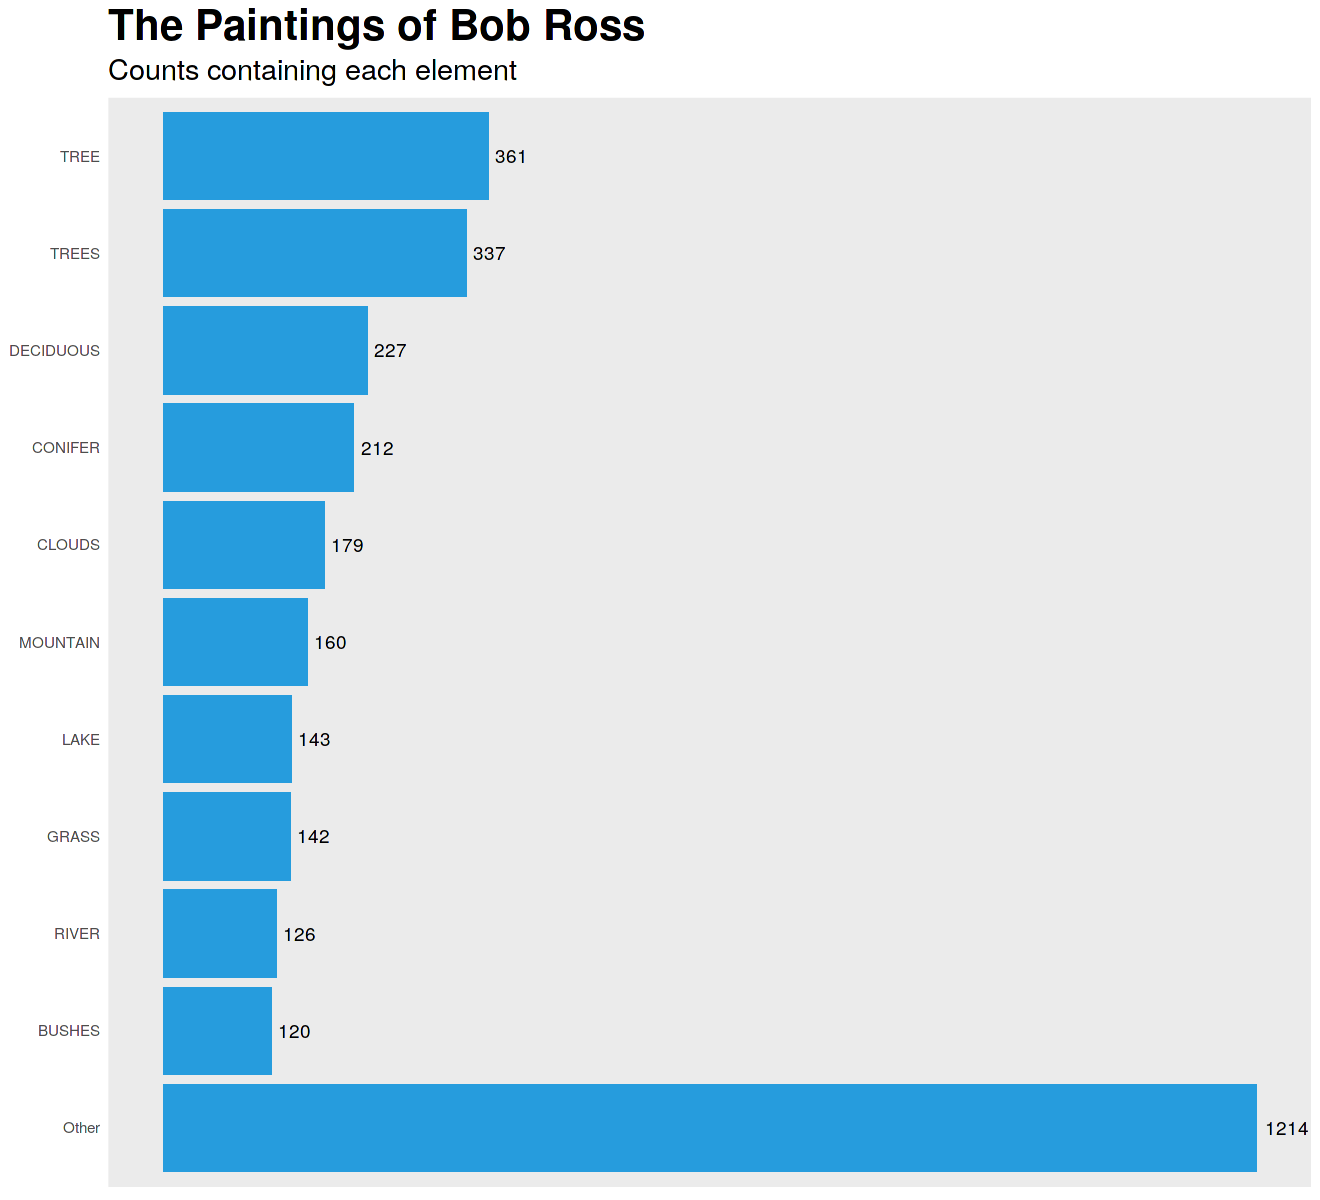

In [139]:
p = p + theme(axis.title.y = element_blank(),
             axis.title.x = element_blank(),
             panel.background = element_rect(fill = "#EBEBEB"),
             panel.grid = element_blank(),
             axis.ticks = element_blank(),
             axis.text.x = element_blank())

plottitle <- theme(plot.title = element_text(face = "bold", size = 25),
                      plot.subtitle = element_text(size = 17))

print(p + plottitle + labs(title = "The Paintings of Bob Ross", subtitle = "Counts containing each element"))